In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Compare Categories 

In [2]:
import os
import glob

# Path to the directory containing the files
file_path = "../local/bbcpy_AutoML/logs/13_11/results/"

# Pattern to match all csv files
pattern = os.path.join(file_path, "*.csv")

# List to hold dataframes
dataframes = []

# Iterate over files that match the csv pattern
for file in glob.glob(pattern):
    # Extract task name, model name, and subject name from the file name
    filename = os.path.basename(file)

    if len(filename.split("_")) == 3:
        task_name, model_name, subject_name = filename.split("_")
    else:
        task_name, _, model_name, subject_name = filename.split("_")
    
    subject_name = subject_name.split('.')[0]  # Remove the file extension
    
    # Load the CSV file
    df = pd.read_csv(file)
    
    # Select and rename columns that contain "mean"
    string_to_check = 'best'
    is_best_in_columns = any(string_to_check in col for col in df.columns)

    if is_best_in_columns:
        wanted_columns = ['val/acc_best', 'val/f1_best']
        df_best = df[df.columns[df.columns.isin(wanted_columns)]]
        # Remove the string "best" from remaining column names
        best_columns = [col for col in df_best.columns if 'best' in col]
        df_best = df_best[best_columns].rename(columns=lambda x: x.replace('_best', ''))

        wanted_columns = ['test/f1', 'test/acc']
        df_test = df[df.columns[df.columns.isin(wanted_columns)]]
    
        # Combine the mean columns back into the dataframe
        df = pd.concat([df_best, df_test], axis=1)
    else:
        wanted_columns = ['test/acc' , 'test/f1' , 'val/acc' , 'val/f1' ]
        df = df[df.columns[df.columns.isin(wanted_columns)]]
    
    # Add task, model, and subject as columns to the dataframe
    df['Task'] = task_name
    df['Model'] = model_name
    df['Subject'] = subject_name
    
    # Append to the list of dataframes
    dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined dataframe
combined_data

,val/acc,val/f1,test/acc,test/f1,Task,Model,Subject
0,0.325926,0.281120,0.282609,0.230939,2D,csp-MNE,S1
1,0.313953,0.289654,0.262626,0.238328,2D,csp-MNE,S10
2,0.405172,0.340890,0.338583,0.291216,2D,csp-MNE,S11
3,0.298077,0.269518,0.346535,0.332445,2D,csp-MNE,S12
4,0.377358,0.379562,0.316327,0.323158,2D,csp-MNE,S13
...,...,...,...,...,...,...,...
570,0.928000,0.934307,0.909836,0.919708,LR,TSCeption,S61
571,0.903846,0.883721,0.873786,0.873786,LR,TSCeption,S62
572,0.780347,0.757062,0.660714,0.571429,LR,TSCeption,S7
573,0.972727,0.974359,0.952991,0.951111,LR,TSCeption,S8


### Check models trained subject 

In [3]:
# List of subjects , splited in 3 categrories according to pvc metric
# LR task
C1_list_LR = ['S5', 'S60', 'S57', 'S39', 'S9', 'S49', 'S30', 'S51', 'S52', 'S8', 'S36', 'S20', 'S50', 'S4', 'S38', 'S2', 'S43', 'S28']
C2_list_LR = ['S29', 'S26', 'S23', 'S19', 'S53', 'S41', 'S35', 'S61', 'S45', 'S14', 'S15', 'S11', 'S25', 'S1']
C3_list_LR = ['S13', 'S10', 'S54', 'S32', 'S7', 'S58', 'S56', 'S48', 'S62', 'S34', 'S12', 'S33', 'S55', 'S22', 'S47', 'S16', 'S27', 'S18', 'S42', 'S31', 'S21', 'S24', 'S17', 'S6', 'S40', 'S3']
# 2d Task
C1_list_2D = ['S52', 'S51', 'S38', 'S39', 'S57', 'S9', 'S49', 'S30', 'S36', 'S20', 'S60', 'S4', 'S23', 'S28', 'S5', 'S8', 'S2', 'S29', 'S26', 'S1']
C2_list_2D = ['S53', 'S61', 'S14', 'S35', 'S54', 'S41', 'S45', 'S50', 'S11', 'S42', 'S25', 'S17', 'S32']
C3_list_2D = ['S13', 'S7', 'S43', 'S19', 'S15', 'S33', 'S12', 'S24', 'S3', 'S40', 'S55', 'S34', 'S10', 'S58', 'S16', 'S27', 'S18', 'S48', 'S31', 'S47', 'S6', 'S21', 'S56', 'S22', 'S62']

In [4]:
len(C1_list_LR)+ len(C2_list_LR) +len(C3_list_LR)

58

In [5]:
len(C1_list_2D)+ len(C2_list_2D) +len(C3_list_2D)

58

In [6]:
# Separate the data by task



# Categorize each subject into C1, C2, or C3
df_lr = combined_data[combined_data['Task'] == 'LR']
df_lr['Category'] = df_lr['Subject'].apply(
    lambda x: 'C1' if x in C1_list_LR else ('C2' if x in C2_list_LR else 'C3')
)

df_2d = combined_data[combined_data['Task'] == '2D']
df_2d['Category'] = df_2d['Subject'].apply(
    lambda x: 'C1' if x in C1_list_2D else ('C2' if x in C2_list_2D else 'C3')
)

C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\661974933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['Category'] = df_lr['Subject'].apply(
C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\661974933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2d['Category'] = df_2d['Subject'].apply(


In [7]:
np.unique(df_lr["Model"].to_numpy(), return_counts=True)

(array(['EEGNet', 'TSCeption', 'csp', 'riemann', 'tangent'], dtype=object),
 array([58, 58, 58, 58, 58], dtype=int64))

In [8]:
df_2d

,val/acc,val/f1,test/acc,test/f1,Task,Model,Subject,Category
0,0.325926,0.281120,0.282609,0.230939,2D,csp-MNE,S1,C1
1,0.313953,0.289654,0.262626,0.238328,2D,csp-MNE,S10,C3
2,0.405172,0.340890,0.338583,0.291216,2D,csp-MNE,S11,C2
3,0.298077,0.269518,0.346535,0.332445,2D,csp-MNE,S12,C3
4,0.377358,0.379562,0.316327,0.323158,2D,csp-MNE,S13,C3
...,...,...,...,...,...,...,...,...
280,0.654762,0.649935,0.637500,0.632822,2D,TSCeption,S61,C2
281,0.574468,0.495952,0.466667,0.395690,2D,TSCeption,S62,C3
282,0.480769,0.428897,0.323529,0.278035,2D,TSCeption,S7,C3
283,0.836735,0.836829,0.787671,0.787863,2D,TSCeption,S8,C1


In [9]:
np.unique(df_2d["Model"].to_numpy(), return_counts=True)

(array(['EEGNet', 'TSCeption', 'csp-MNE', 'riemann', 'tangent'],
       dtype=object),
 array([57, 57, 57, 57, 57], dtype=int64))

## LR Task

In [10]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.transform import factor_cmap, dodge
from bokeh.layouts import column
from bokeh.palettes import Spectral6
import pandas as pd
import numpy as np

# Ensure plots are displayed within the Jupyter Notebook
output_notebook()


Loading BokehJS ...

In [11]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Whisker, HoverTool, BoxAnnotation
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Ensure plots are displayed within the Jupyter Notebook
output_notebook()

# Prepare your data
# Assuming df_lr is your DataFrame and it includes columns 'Model', 'Subject', 'test/acc', and 'Category'
df_lr = combined_data[combined_data['Task'] == 'LR']
df_lr['Category'] = df_lr['Subject'].apply(
    lambda x: 'C1' if x in C1_list_LR else ('C2' if x in C2_list_LR else 'C3')
)


# Assign colors to each category
category_colors = {
    'C1': 'red', 
    'C2': 'green', 
    'C3': 'blue'
}

# Create a mapping of subjects to their categories
subject_to_category = df_lr.set_index('Subject')['Category'].to_dict()

# Update color in the dataframe based on category
df_lr['color'] = df_lr['Subject'].map(subject_to_category).map(category_colors)

# Compute quantiles for each model
models = df_lr['Model'].unique()
qs = df_lr.groupby('Model')['test/acc'].quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ['Model', 'q1', 'q2', 'q3']
df_lr = pd.merge(df_lr, qs, on='Model', how='left')

# Compute IQR outlier bounds
iqr = df_lr['q3'] - df_lr['q1']
df_lr['upper'] = df_lr['q3'] + 1.5 * iqr
df_lr['lower'] = df_lr['q1'] - 1.5 * iqr

# Cap the upper whisker at 1.0
df_lr['upper'] = df_lr['upper'].clip(upper=1.0)

# Format 'test/acc' for hover display
df_lr['test_acc_formatted'] = df_lr['test/acc'].apply(lambda x: f'{x:.3f}')

source = ColumnDataSource(df_lr)

# Create a figure
p = figure(width=1200, height=800, x_range=models, y_range=(0, 1), 
           title="Distribution of Test Accuracies with Individual Data Points of Models - LR Task",
           background_fill_color="#eaefef", y_axis_label="Test Accuracy")

# Adjust the palette size to the number of models
num_models = len(models)
palette = Category20[num_models] if num_models <= 20 else Category20[20]

# Outlier range
whisker = Whisker(base="Model", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 10
p.add_layout(whisker)

# Quantile boxes
cmap = factor_cmap('Model', palette=palette, factors=models)
p.vbar('Model', 0.7, 'q2', 'q3', source=source, color=cmap, line_color="black")
p.vbar('Model', 0.7, 'q1', 'q2', source=source, color=cmap, line_color="black")

# Outliers
outliers = df_lr[~df_lr['test/acc'].between(df_lr['lower'], df_lr['upper'])]
p.scatter('Model', 'test/acc', source=outliers, size=6, color="black", alpha=0.3)

# Individual data points
p.scatter('Model', 'test/acc', source=source, color='color', size=8)

# Add hover tool
hover = HoverTool(tooltips=[("Subject", "@Subject"), ("Test Acc", "@test_acc_formatted"), ("Category", "@Category")])
p.add_tools(hover)

# Styling
p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size = "14px"
p.axis.axis_label_text_font_size = "12px"

# Add threshold lines
threshold_1 = BoxAnnotation(top=0.5, fill_alpha=0.1, fill_color='red')
threshold_2 = BoxAnnotation(bottom=1.0, fill_alpha=0.1, fill_color='blue')
p.add_layout(threshold_1)
p.add_layout(threshold_2)

# Show the plot
show(p)


Loading BokehJS ...

C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\2799594665.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['Category'] = df_lr['Subject'].apply(
C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\2799594665.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['color'] = df_lr['Subject'].map(subject_to_category).map(category_colors)


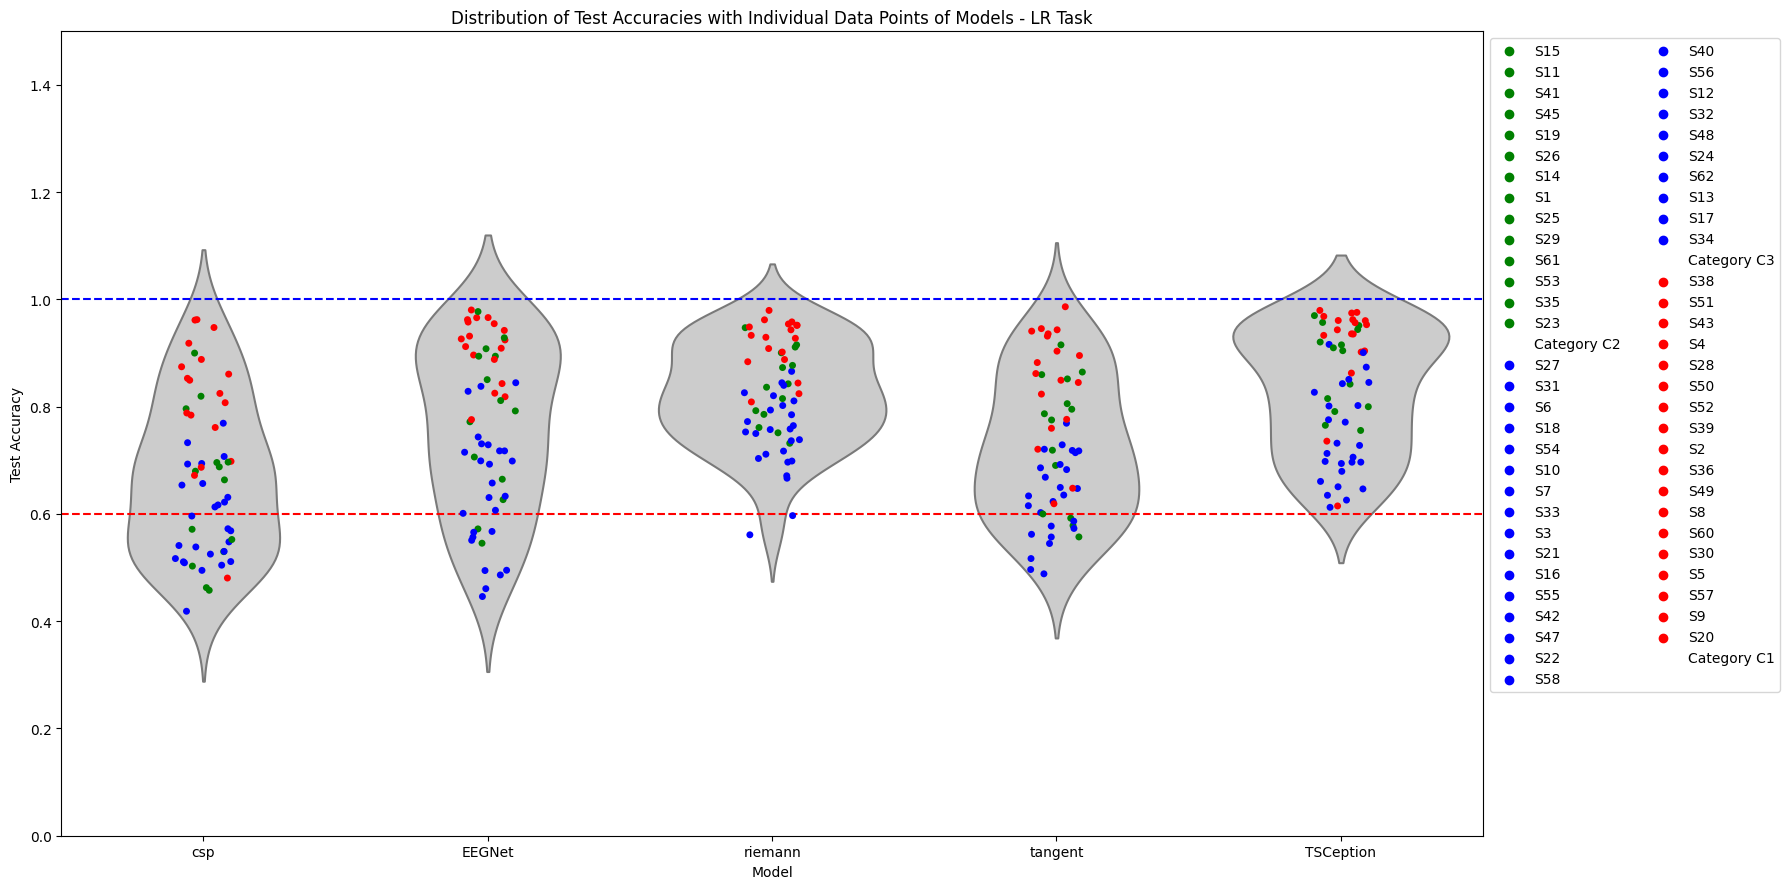

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean score for each subject
subject_scores = df_lr.groupby('Subject')['test/acc'].mean().sort_values(ascending=True)

# Assign colors to each category
category_colors = {
    'C1': 'red', 
    'C2': 'green', 
    'C3': 'blue'
}

# Create a mapping of subjects to their categories
subject_to_category = df_lr.set_index('Subject')['Category'].to_dict()

# Update the color map to assign colors based on category
color_map = {subject: category_colors[category] for subject, category in subject_to_category.items()}

# Set the figure size
plt.figure(figsize=(18, 9))

# Create the violin plot for 'test/acc'
sns.violinplot(x='Model', y='test/acc', data=df_lr, inner=None, color=".8")

# Overlay the individual data points with colors mapped to categories
ax = sns.stripplot(x='Model', y='test/acc', data=df_lr, jitter=True, 
                   hue='Subject', dodge=False, palette=color_map, hue_order=subject_scores.index)

# Draw threshold lines
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=1.0, color='b', linestyle='--')

# Set plot title and labels
plt.title('Distribution of Test Accuracies with Individual Data Points of Models - LR Task')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

# Limit the y-axis to not pass 1
plt.ylim(0, 1.5)

# Collect labels and handles for the legend
handles, labels = ax.get_legend_handles_labels()

# Consolidate handles and labels by category
category_legends = []
for category in df_lr['Category'].unique():
    category_handles = [h for h, l in zip(handles, labels) if subject_to_category.get(l) == category]
    category_labels = [l for l in labels if subject_to_category.get(l) == category]
    category_legends.extend(category_handles)
    category_legends.append(plt.Line2D([], [], color='none', label=f'Category {category}'))

# Create a single, consolidated legend
plt.legend(handles=category_legends,bbox_to_anchor=(1, 1), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()


In [13]:
# Map the sorted subjects to their categories
sorted_categories = subject_scores.index.map(subject_to_category)



In [14]:
sorted_categories

Index(['C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C2', 'C3', 'C3', 'C3', 'C2',
       'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C2', 'C3', 'C3', 'C3', 'C3',
       'C2', 'C2', 'C3', 'C3', 'C1', 'C1', 'C1', 'C3', 'C2', 'C3', 'C2', 'C3',
       'C2', 'C2', 'C2', 'C2', 'C2', 'C1', 'C1', 'C1', 'C1', 'C2', 'C1', 'C1',
       'C1', 'C1', 'C2', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1'],
      dtype='object', name='Subject')

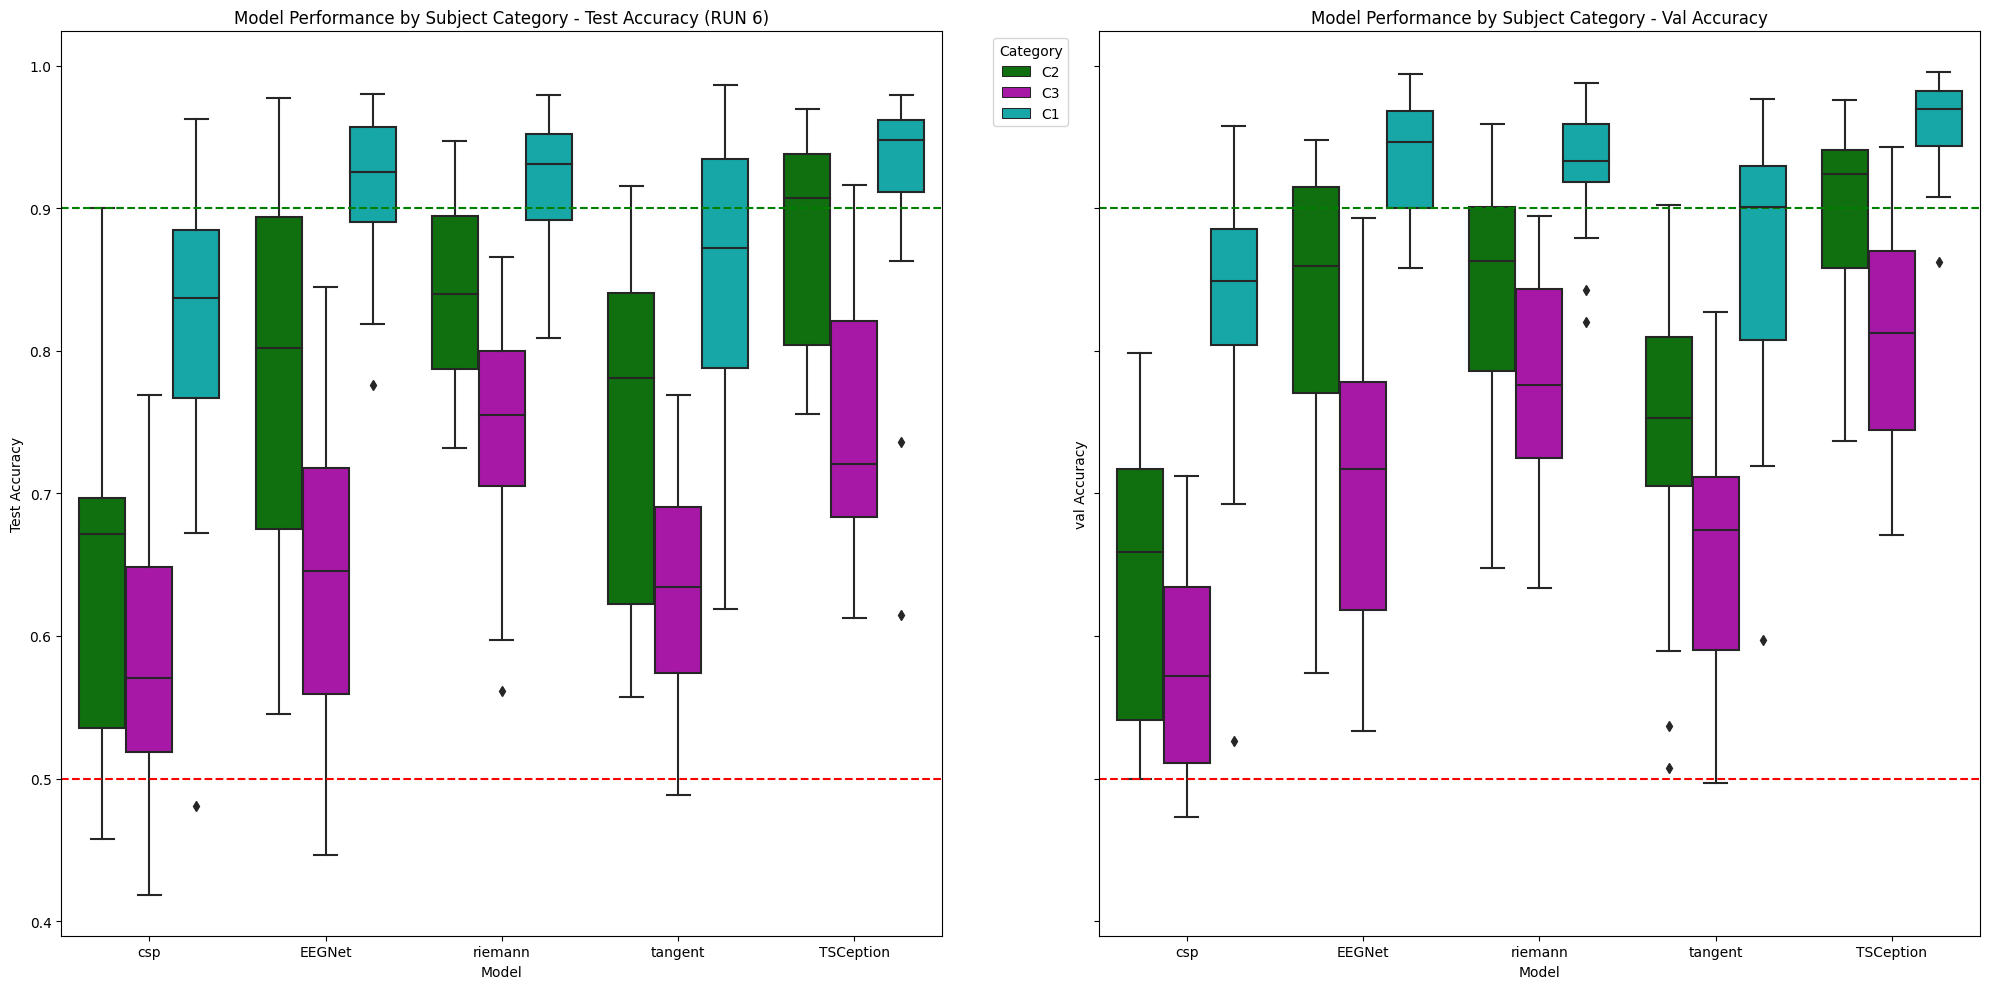

In [15]:
# Define the color palette for the categories
palette = {"C1": "c", "C2": "g", "C3": "m"}

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Draw boxplots for 'test/acc'
sns.boxplot(data=df_lr, x='Model', y='test/acc', hue='Category', palette=palette, dodge=True, ax=ax1)
# Draw a threshold line
ax1.axhline(y=0.5, color='r', linestyle='--')
ax1.axhline(y=0.9, color='g', linestyle='--')
ax1.set_title('Model Performance by Subject Category - Test Accuracy (RUN 6)')
ax1.set_xlabel('Model')
ax1.set_ylabel('Test Accuracy')
ax1.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Draw boxplots for 'test/f1'
sns.boxplot(data=df_lr, x='Model', y='val/acc', hue='Category', palette=palette, dodge=True, ax=ax2)
ax2.axhline(y=0.5, color='r', linestyle='--')
ax2.axhline(y=0.9, color='g', linestyle='--')
ax2.set_title('Model Performance by Subject Category - Val Accuracy')
ax2.set_xlabel('Model')
ax2.set_ylabel('val Accuracy')
ax2.legend_.remove()  # Remove the second legend

plt.tight_layout()
plt.show()

## 2D Task

In [16]:
df_2d

,val/acc,val/f1,test/acc,test/f1,Task,Model,Subject,Category
0,0.325926,0.281120,0.282609,0.230939,2D,csp-MNE,S1,C1
1,0.313953,0.289654,0.262626,0.238328,2D,csp-MNE,S10,C3
2,0.405172,0.340890,0.338583,0.291216,2D,csp-MNE,S11,C2
3,0.298077,0.269518,0.346535,0.332445,2D,csp-MNE,S12,C3
4,0.377358,0.379562,0.316327,0.323158,2D,csp-MNE,S13,C3
...,...,...,...,...,...,...,...,...
280,0.654762,0.649935,0.637500,0.632822,2D,TSCeption,S61,C2
281,0.574468,0.495952,0.466667,0.395690,2D,TSCeption,S62,C3
282,0.480769,0.428897,0.323529,0.278035,2D,TSCeption,S7,C3
283,0.836735,0.836829,0.787671,0.787863,2D,TSCeption,S8,C1


In [13]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Whisker, HoverTool, BoxAnnotation
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Ensure plots are displayed within the Jupyter Notebook
output_notebook()

# Prepare your data
df_2d = combined_data[combined_data['Task'] == '2D']
df_2d['Category'] = df_2d['Subject'].apply(
    lambda x: 'C1' if x in C1_list_2D else ('C2' if x in C2_list_2D else 'C3')
)

# Assign colors to each category
category_colors = {
    'C1': 'red', 
    'C2': 'green', 
    'C3': 'blue'
}

# Create a mapping of subjects to their categories
subject_to_category = df_2d.set_index('Subject')['Category'].to_dict()

# Update color in the dataframe based on category
df_2d['color'] = df_2d['Subject'].map(subject_to_category).map(category_colors)

# Compute quantiles for each model
models = df_2d['Model'].unique()
qs = df_2d.groupby('Model')['test/acc'].quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ['Model', 'q1', 'q2', 'q3']
df_2d = pd.merge(df_2d, qs, on='Model', how='left')

# Compute IQR outlier bounds
iqr = df_2d['q3'] - df_2d['q1']
df_2d['upper'] = df_2d['q3'] + 1.5 * iqr
df_2d['lower'] = df_2d['q1'] - 1.5 * iqr

# Cap the upper whisker at 1.0
df_2d['upper'] = df_2d['upper'].clip(upper=1.0)

# Format 'test/acc' for hover display
df_2d['test_acc_formatted'] = df_2d['test/acc'].apply(lambda x: f'{x:.3f}')

source = ColumnDataSource(df_2d)

# Create a figure
p = figure(width=1200, height=800, x_range=models, y_range=(0, 1), background_fill_color="#eaefef",
           title="Distribution of Test Accuracies with Individual Data Points of Models - LR Task", y_axis_label="Test Accuracy")

# Adjust the palette size to the number of models
num_models = len(models)
palette = Category20[num_models] if num_models <= 20 else Category20[20]

# Outlier range
whisker = Whisker(base="Model", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 10
p.add_layout(whisker)

# Quantile boxes
cmap = factor_cmap('Model', palette=palette, factors=models)
p.vbar('Model', 0.7, 'q2', 'q3', source=source,  line_color=cmap,fill_color=None )
p.vbar('Model', 0.7, 'q1', 'q2', source=source,  line_color=cmap,fill_color=None)

# Outliers
outliers = df_2d[~df_2d['test/acc'].between(df_2d['lower'], df_2d['upper'])]
p.scatter('Model', 'test/acc', source=outliers, size=6, color="black", alpha=0.3)

# Individual data points
p.scatter('Model', 'test/acc', source=source, color='color', size=8)

# Add hover tool
hover = HoverTool(tooltips=[("Subject", "@Subject"), ("Test Acc", "@test_acc_formatted"), ("Category", "@Category")])
p.add_tools(hover)

# Styling
p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size = "14px"
p.axis.axis_label_text_font_size = "12px"

# Add threshold lines
threshold_1 = BoxAnnotation(top=0.25, fill_alpha=0.1, fill_color='red')
threshold_2 = BoxAnnotation(bottom=1.0, fill_alpha=0.1, fill_color='blue')
p.add_layout(threshold_1)
p.add_layout(threshold_2)

# Show the plot
show(p)


Loading BokehJS ...

C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\1074092728.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2d['Category'] = df_2d['Subject'].apply(
C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\1074092728.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2d['color'] = df_2d['Subject'].map(subject_to_category).map(category_colors)


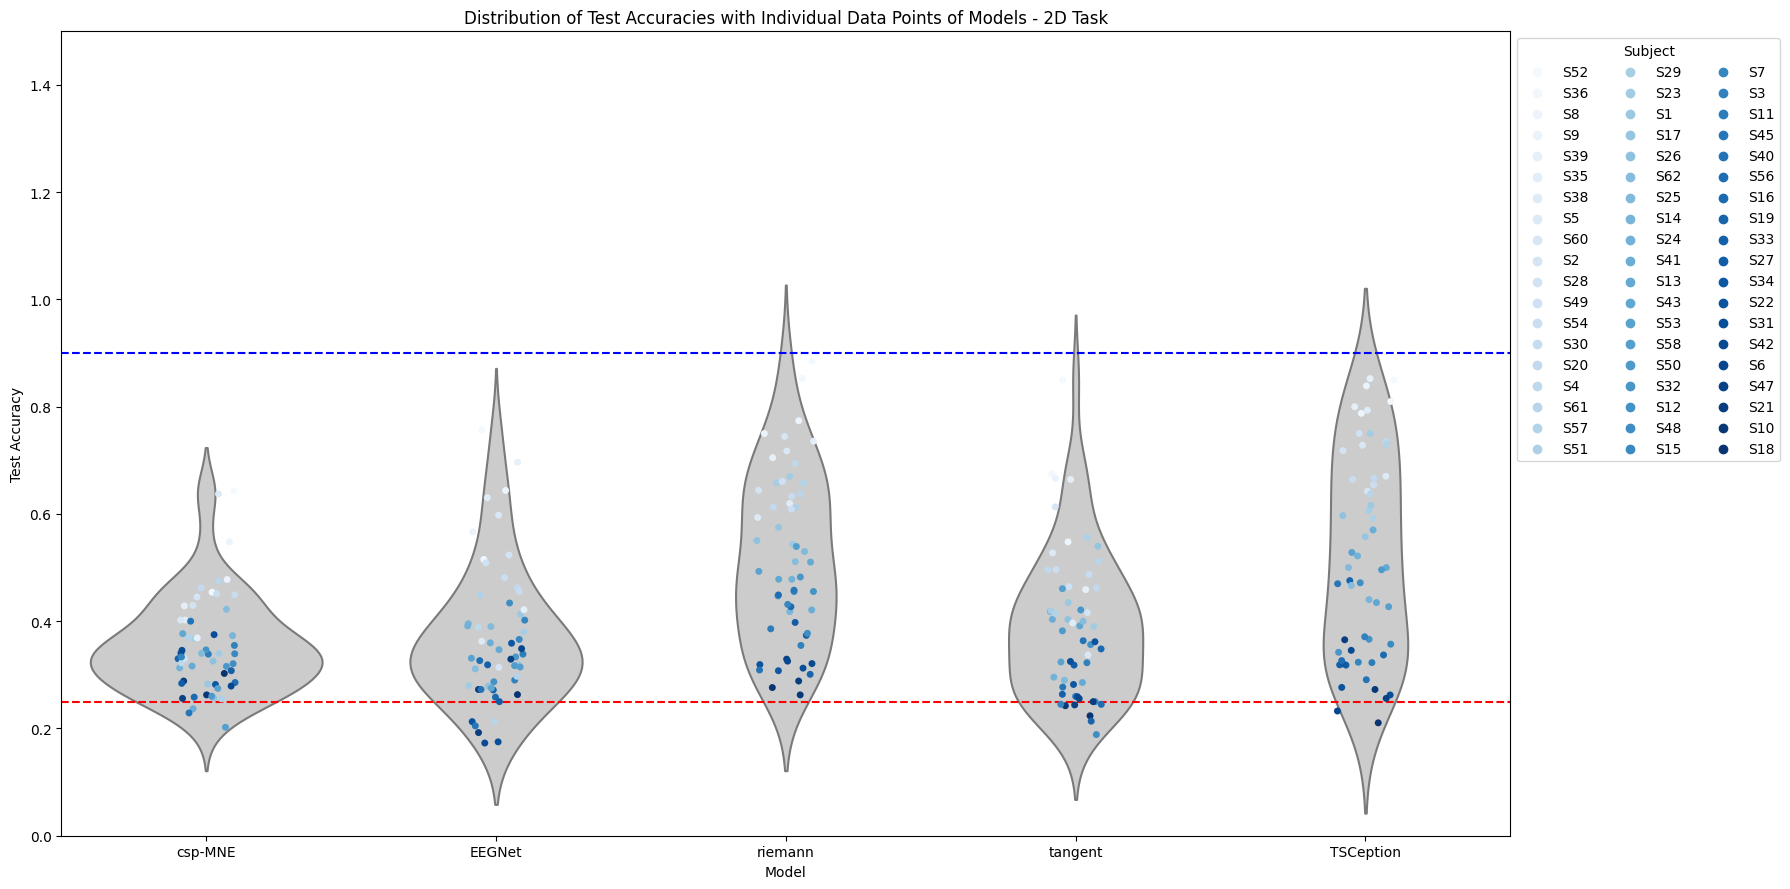

In [18]:
# Calculate mean score for each subject
subject_scores = df_2d.groupby('Subject')['test/acc'].mean().sort_values(ascending=False)

# Create a color palette from dark to light based on the number of unique subjects
palette = sns.color_palette("Blues", n_colors=len(subject_scores))

# Map subjects to colors based on their sorted scores
color_map = dict(zip(subject_scores.index, palette))

# Set the figure size
plt.figure(figsize=(18, 9))

# Create the violin plot for 'test/acc'
# Ensure 'hue' is set to 'Category' for split violins

sns.violinplot(x='Model', y='test/acc', data=df_2d, inner=None, color=".8")

# Overlay the individual data points with colors mapped to subjects
# Use 'hue_order' to ensure consistent color mapping
sns.stripplot(x='Model', y='test/acc', data=df_2d, jitter=True, 
              hue='Subject', dodge=False, palette=color_map, hue_order=subject_scores.index)

# Draw threshold lines
plt.axhline(y=0.25, color='r', linestyle='--')
plt.axhline(y=0.9, color='b', linestyle='--')

# Set plot title and labels
plt.title('Distribution of Test Accuracies with Individual Data Points of Models - 2D Task')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')


# Limit the y-axis to not pass 1
plt.ylim(0, 1.5)

# Collect labels and handles for the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Separate out the handles for categories and subjects
category_handles = [h for h, l in zip(handles, labels) if l in df_2d['Category'].unique()]
subject_handles = [h for h, l in zip(handles, labels) if l in subject_scores.index]

# Create custom legends

subject_legend = plt.legend(subject_handles, subject_scores.index, title='Subject', bbox_to_anchor=(1, 1), loc='upper left', ncol=3)



plt.tight_layout()
plt.show()

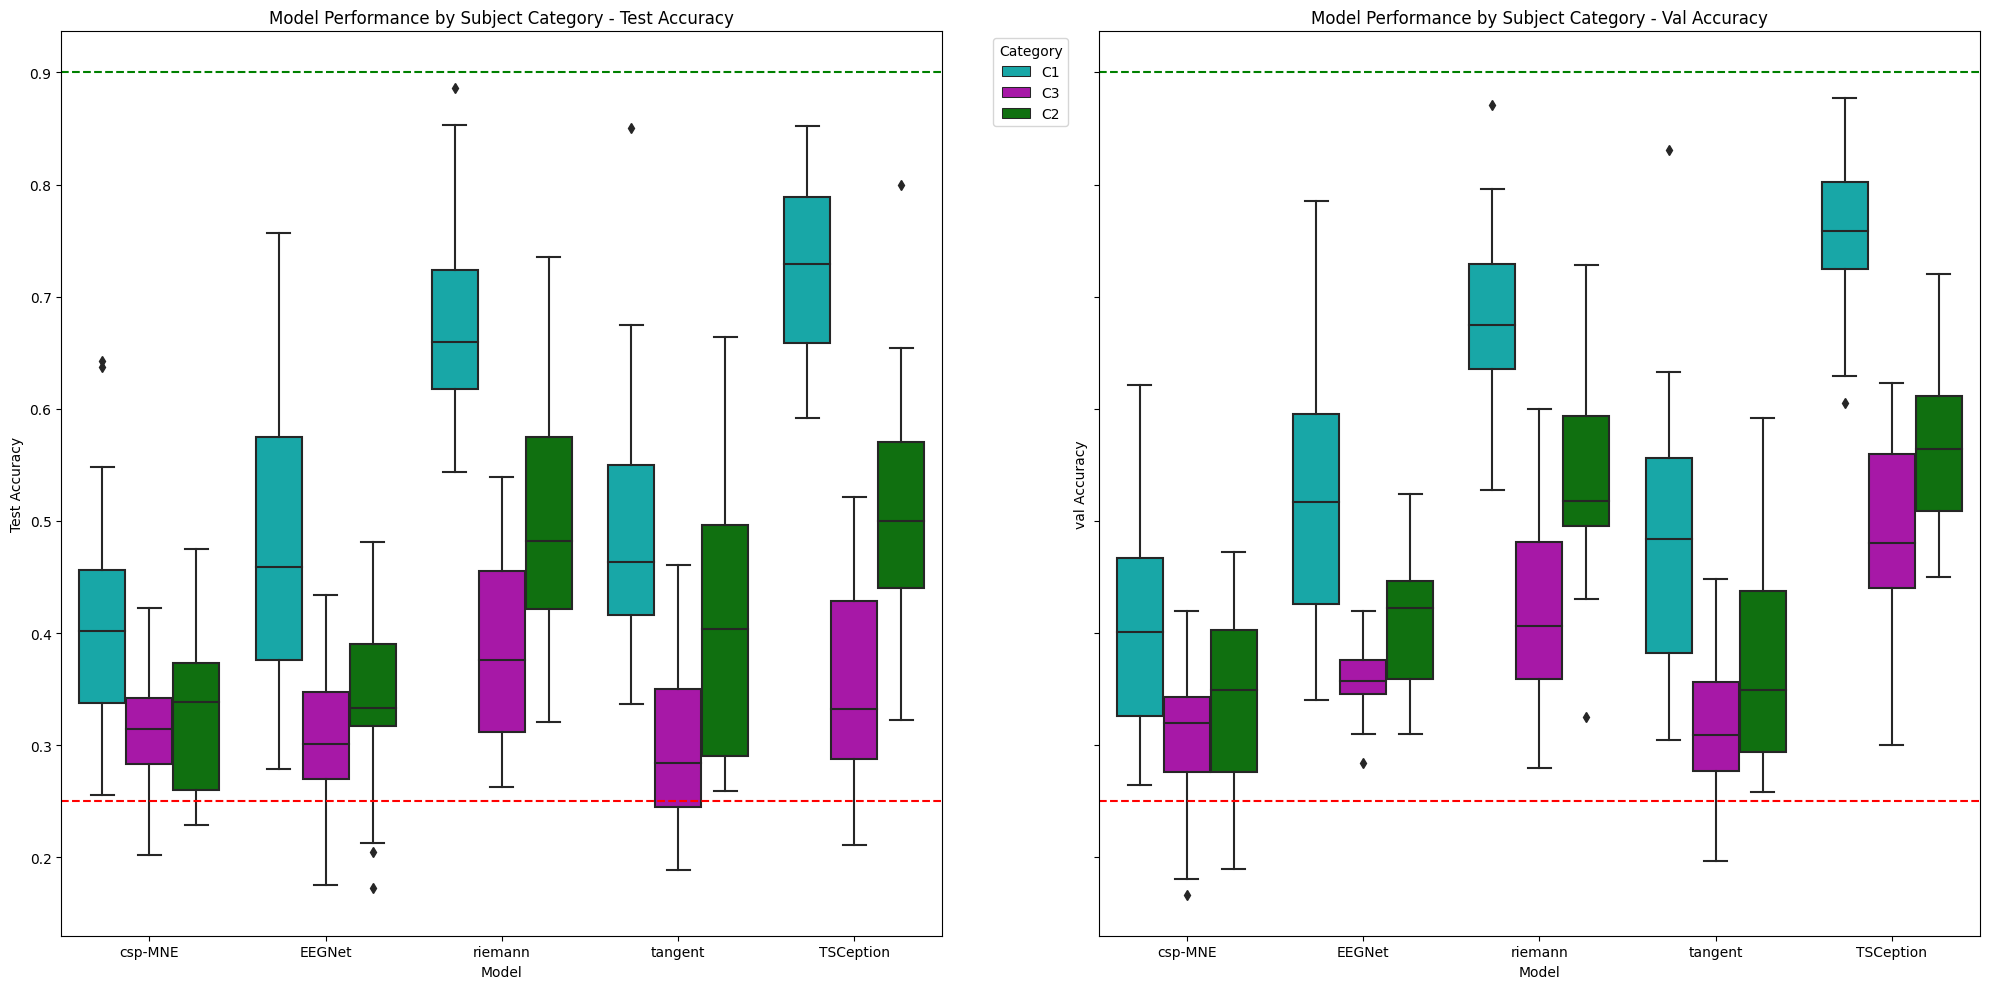

In [19]:
# Define the color palette for the categories
palette = {"C1": "c", "C2": "g", "C3": "m"}

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Draw boxplots for 'test/acc'
sns.boxplot(data=df_2d, x='Model', y='test/acc', hue='Category', palette=palette, dodge=True, ax=ax1)
# Draw a threshold line
ax1.axhline(y=.25, color='r', linestyle='--')
ax1.axhline(y=0.9, color='g', linestyle='--')
ax1.set_title('Model Performance by Subject Category - Test Accuracy')
ax1.set_xlabel('Model')
ax1.set_ylabel('Test Accuracy')
ax1.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Draw boxplots for 'test/f1'
sns.boxplot(data=df_2d, x='Model', y='val/acc', hue='Category', palette=palette, dodge=True, ax=ax2)
ax2.axhline(y=.25, color='r', linestyle='--')
ax2.axhline(y=0.9, color='g', linestyle='--')
ax2.set_title('Model Performance by Subject Category - Val Accuracy')
ax2.set_xlabel('Model')
ax2.set_ylabel('val Accuracy')
ax2.legend_.remove()  # Remove the second legend

plt.tight_layout()
plt.show()

## Models Performance Comparison

Wilcoxon signed-rank test is a non-parametric test.Its used to compare two related samples to determine whether their population mean ranks differ. It is a paired difference test that is an alternative to the paired Student's t-test when the data cannot be assumed to be normally distributed.

In [14]:
import pandas as pd
from scipy.stats import wilcoxon
import itertools

In [17]:
# Assuming df_lr is your DataFrame and it includes columns 'Model', 'Subject', 'test/acc', and 'Category'
df_lr = combined_data[combined_data['Task'] == 'LR']
df_lr['Category'] = df_lr['Subject'].apply(
    lambda x: 'C1' if x in C1_list_LR else ('C2' if x in C2_list_LR else 'C3')
)
df_lr

C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\1072062135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['Category'] = df_lr['Subject'].apply(


,val/acc,val/f1,test/acc,test/f1,Task,Model,Subject,Category
285,0.691489,0.691244,0.679775,0.677878,LR,csp,S1,C2
286,0.473054,0.471199,0.511236,0.511066,LR,csp,S10,C3
287,0.536842,0.432632,0.502793,0.377422,LR,csp,S11,C2
288,0.621118,0.617654,0.622093,0.619442,LR,csp,S12,C3
289,0.648045,0.647604,0.707182,0.706196,LR,csp,S13,C3
...,...,...,...,...,...,...,...,...
570,0.928000,0.934307,0.909836,0.919708,LR,TSCeption,S61,C2
571,0.903846,0.883721,0.873786,0.873786,LR,TSCeption,S62,C3
572,0.780347,0.757062,0.660714,0.571429,LR,TSCeption,S7,C3
573,0.972727,0.974359,0.952991,0.951111,LR,TSCeption,S8,C1


In [21]:
from scipy.stats import wilcoxon
import itertools

# Filter the data to focus on the 'test/acc' metric
data_test_acc = df_lr[['Model', 'Subject', 'test/acc']]

# Get unique models and subjects
models = data_test_acc['Model'].unique()
subjects = data_test_acc['Subject'].unique()

# Revised approach: Compare models across all subjects together

# Initialize a dictionary to store the revised Wilcoxon test results
revised_wilcoxon_results = {}

# Perform Wilcoxon signed-rank tests for each pair of models across all subjects
for model_pair in itertools.combinations(models, 2):
    # Extract test accuracy for each model in the pair across all subjects
    acc_model_1 = data_test_acc[data_test_acc['Model'] == model_pair[0]]['test/acc']
    acc_model_2 = data_test_acc[data_test_acc['Model'] == model_pair[1]]['test/acc']

    # Check if there is data for both models and if they are not all equal
    if not acc_model_1.empty and not acc_model_2.empty and not acc_model_1.equals(acc_model_2):
        try:
            # Perform Wilcoxon signed-rank test
            stat, p = wilcoxon(acc_model_1, acc_model_2)
            revised_wilcoxon_results[model_pair] = (stat, p)
        except ValueError as e:
            # Handle cases with all zeros differences
            revised_wilcoxon_results[model_pair] = ('Error', str(e))
    else:
        revised_wilcoxon_results[model_pair] = ('Data not suitable for test', 'N/A')

revised_wilcoxon_results  # Display the revised results



{('csp', 'EEGNet'): (242.0, 2.0348657814256303e-06),
 ('csp', 'riemann'): (19.0, 9.389072770085713e-11),
 ('csp', 'tangent'): (306.5, 3.603652632862128e-05),
 ('csp', 'TSCeption'): (62.0, 8.069566298090765e-10),
 ('EEGNet', 'riemann'): (295.0, 1.4275136240513333e-05),
 ('EEGNet', 'tangent'): (572.0, 0.02816677887783734),
 ('EEGNet', 'TSCeption'): (149.0, 7.330402879537982e-08),
 ('riemann', 'tangent'): (3.0, 8.880118337733133e-11),
 ('riemann', 'TSCeption'): (700.0, 0.22861465914411416),
 ('tangent', 'TSCeption'): (78.0, 1.7476700980931413e-09)}

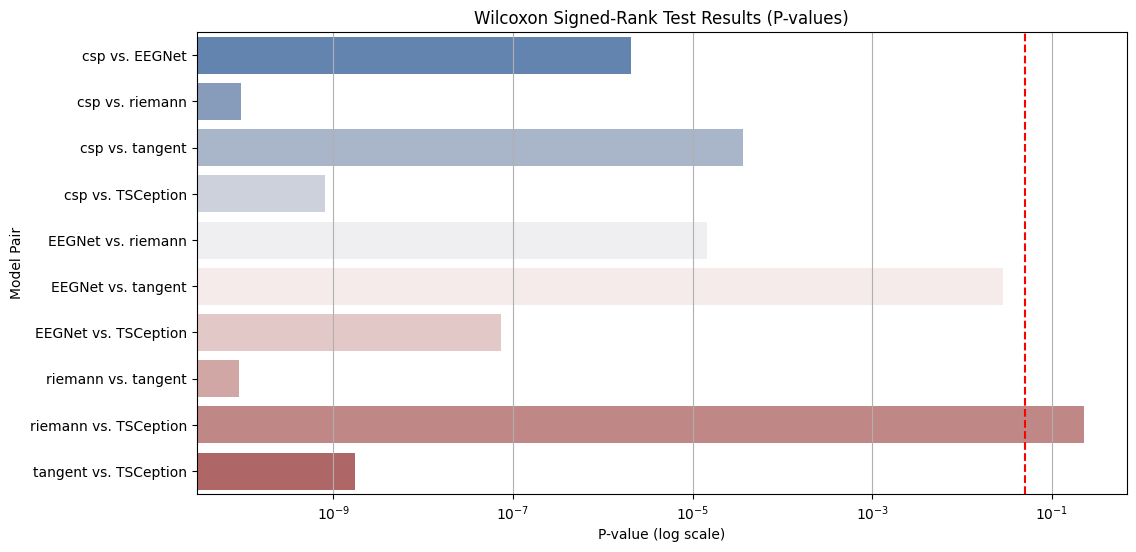

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the results to a format suitable for plotting
model_pairs = list(revised_wilcoxon_results.keys())
p_values = [revised_wilcoxon_results[pair][1] for pair in model_pairs]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Model Pair': [' vs. '.join(pair) for pair in model_pairs],
    'P-value': p_values
})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='P-value', y='Model Pair', data=plot_data, palette="vlag")
plt.xscale('log')  # Use logarithmic scale for better visibility of small p-values
plt.xlabel('P-value (log scale)')
plt.ylabel('Model Pair')
plt.title('Wilcoxon Signed-Rank Test Results (P-values)')
plt.axvline(x=0.05, color='red', linestyle='--')  # Threshold for significance
plt.grid(axis='x')

# Show the plot
plt.show()



Interpreting the results of the Wilcoxon signed-rank test, particularly in relation to the p-values, involves understanding what these values indicate about the differences between the models you're comparing. Here's a guide to help you interpret the results:

Understanding P-values:

A p-value is a measure of the probability that an observed difference (in this case, in 'test/acc' between two models) could have occurred by random chance.
A smaller p-value indicates that the observed difference is less likely to be due to random chance, implying a more significant difference between the models.
A common threshold for significance is p = 0.05. If the p-value is below this threshold, the difference is typically considered statistically significant.
Interpreting Results Based on P-values:

P-value < 0.05 (Significant): If the p-value is below 0.05, as indicated by the bars to the left of the red dashed line in the plot, this suggests that there is a statistically significant difference in 'test/acc' between the two models being compared. You can be more confident that the difference is not just a result of random variation.
P-value ≥ 0.05 (Not Significant): If the p-value is equal to or greater than 0.05, as indicated by the bars to the right of the red dashed line, this suggests that the difference in 'test/acc' might not be statistically significant. In other words, the difference could plausibly have arisen by chance, and there is less confidence in asserting a true difference in model performance.
Contextualizing the Results:

Practical vs. Statistical Significance: It's important to differentiate between statistical significance (as indicated by the p-value) and practical significance. Even if a difference is statistically significant, it might not be large enough to be of practical importance in your specific application or field.
Overall Model Comparison: Use these results to understand which models perform similarly and which ones show distinct differences in performance. This can guide decisions on model selection or further investigation into why certain models perform better than others.
Limitations:

Assumptions of the Test: The Wilcoxon signed-rank test has certain assumptions, such as the data being paired and coming from the same population. Violations of these assumptions can affect the validity of the results.
Multiple Comparisons: Performing multiple tests increases the chance of finding at least one significant result by chance (Type I error). In cases of multiple comparisons, more stringent correction methods like Bonferroni correction might be needed.
Remember, while p-values provide valuable statistical insights, they should be interpreted in the context of the study, the data, and the specific models being compared.

## LR task

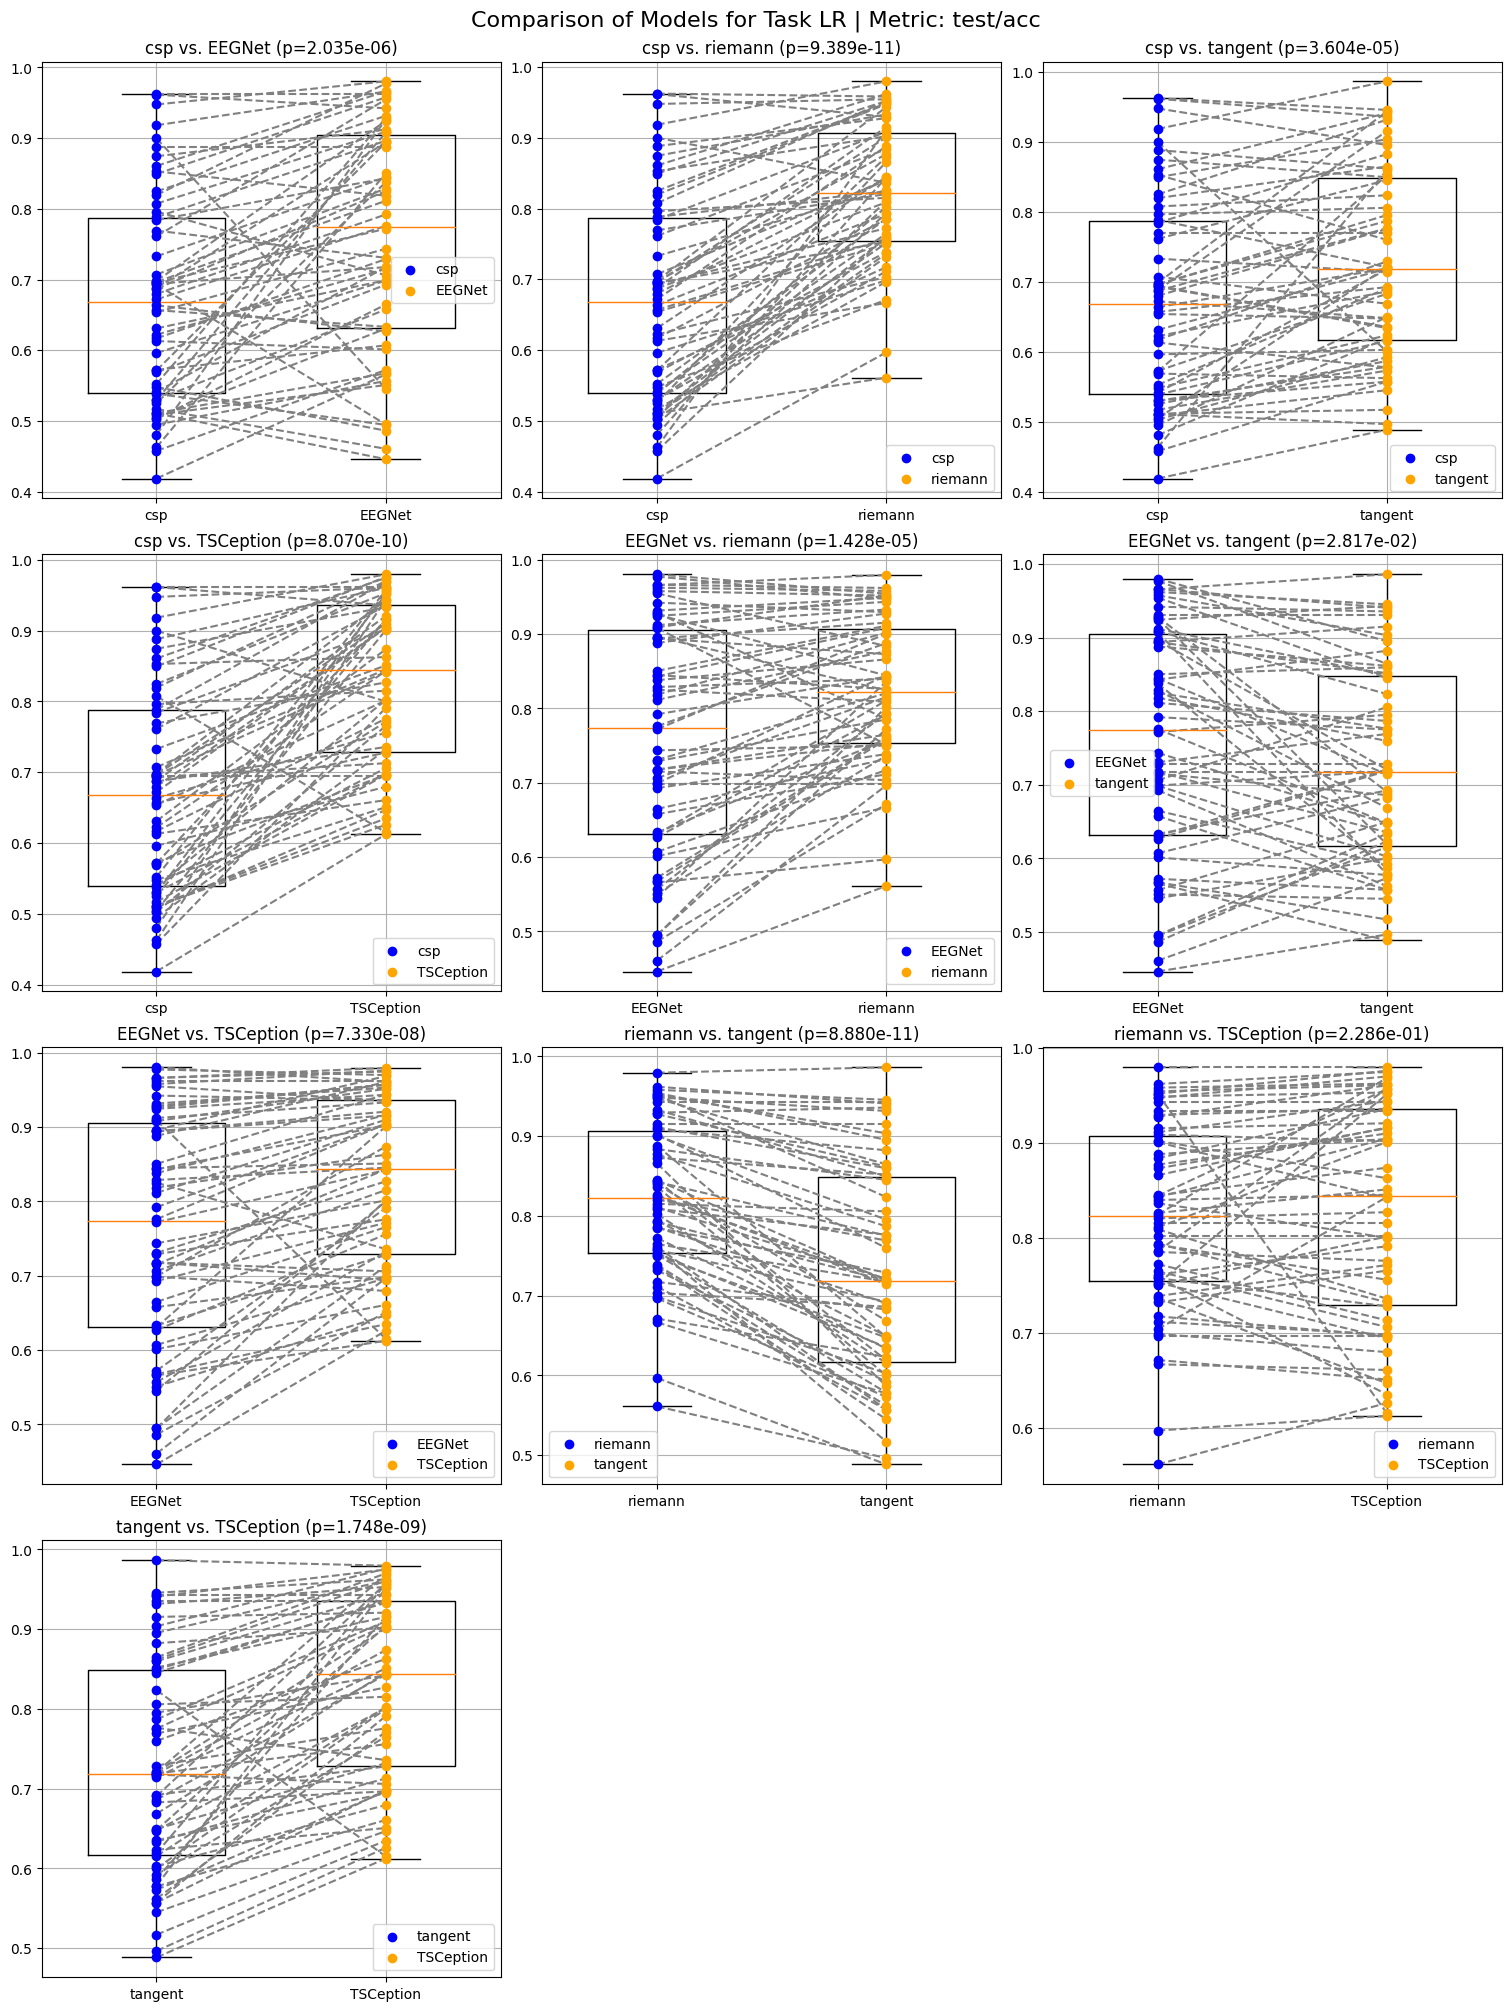

In [49]:
# Get unique models
metric_name = 'test/acc'
unique_models_lr = df_lr['Model'].unique()

# Create all unique pairs of models
model_pairs = list(itertools.combinations(unique_models_lr, 2))

# Number of rows and columns for subplots
n = len(model_pairs)
ncols = 3
nrows = n // ncols + (n % ncols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop through each pair and perform plotting
for i, (model1, model2) in enumerate(model_pairs):
    # Data for model 1
    scores_model1 = df_lr[df_lr['Model'] == model1][['Subject', metric_name]].set_index('Subject')
    # Data for model 2
    scores_model2 = df_lr[df_lr['Model'] == model2][['Subject', metric_name]].set_index('Subject')
    # Merge the scores
    merged_scores = scores_model1.join(scores_model2, lsuffix=f'_{model1}', rsuffix=f'_{model2}').dropna()
    
    # Calculate the Wilcoxon signed-rank test
    stat, p_value = wilcoxon(merged_scores[f'{metric_name}_{model1}'], merged_scores[f'{metric_name}_{model2}'])
    
    # Boxplot for model 1 scores
    axes[i].boxplot(merged_scores[f'{metric_name}_{model1}'], positions=[1], widths=0.6)
    # Boxplot for model 2 scores
    axes[i].boxplot(merged_scores[f'{metric_name}_{model2}'], positions=[2], widths=0.6)
    
    # Scatter plot and lines
    axes[i].scatter(np.repeat(1, merged_scores.shape[0]), merged_scores[f'{metric_name}_{model1}'], color='blue', label=model1, zorder=3)
    axes[i].scatter(np.repeat(2, merged_scores.shape[0]), merged_scores[f'{metric_name}_{model2}'], color='orange', label=model2, zorder=3)
    # Connect the dots for each subject
    for j in range(merged_scores.shape[0]):
        axes[i].plot([1, 2], [merged_scores[f'{metric_name}_{model1}'][j], merged_scores[f'{metric_name}_{model2}'][j]], color='grey', linestyle='--', zorder=2)
    
    # Formatting each subplot
    axes[i].set_xticks([1, 2])
    axes[i].set_xticklabels([model1, model2])
    axes[i].set_title(f'{model1} vs. {model2} (p={p_value:.3e})')
    axes[i].legend()
    axes[i].grid(True)

# Hide any unused subplots
for i in range(n, nrows * ncols):
    fig.delaxes(axes[i])

# Add a big title for the entire figure
fig.suptitle(f'Comparison of Models for Task LR | Metric: {metric_name}', fontsize=16)


# Show the plot
plt.show()


In [48]:
# Summarizing the model performance in a table format

# Initialize a list to store performance summaries
model_performance_summary = []

# Loop through each model to summarize performance
for model in unique_models_lr:
    # Filter the data for the specific model
    model_data = df_lr[df_lr['Model'] == model]
    
    # Calculate summary statistics
    mean_val_acc = model_data[metric_name].mean()
    std_val_acc = model_data[metric_name].std()
    min_val_acc = model_data[metric_name].min()
    max_val_acc = model_data[metric_name].max()
    
    # Add to the performance summary list
    model_performance_summary.append({
        'Model': model,
        f'Mean {metric_name}': mean_val_acc,
        f'Std {metric_name}': std_val_acc,
        f'Min {metric_name}': min_val_acc,
        f'Max {metric_name}': max_val_acc
    })

# Convert the summary list to a DataFrame
performance_summary_df = pd.DataFrame(model_performance_summary)

# Sort the models by mean validation accuracy
performance_summary_df_sorted = performance_summary_df.sort_values(by=f'Mean {metric_name}', ascending=False)

# Display the performance summary table
performance_summary_df_sorted

,Model,Mean test/acc,Std test/acc,Min test/acc,Max test/acc
4,TSCeption,0.829024,0.116273,0.612403,0.979592
2,riemann,0.822144,0.097694,0.561151,0.979592
1,EEGNet,0.759204,0.157511,0.446043,0.980392
3,tangent,0.725342,0.134656,0.488372,0.986395
0,csp,0.670895,0.146933,0.418605,0.962343


## 2D task 

In [42]:
# Prepare your data
df_2d = combined_data[combined_data['Task'] == '2D']
df_2d['Category'] = df_2d['Subject'].apply(
    lambda x: 'C1' if x in C1_list_2D else ('C2' if x in C2_list_2D else 'C3')
)


C:\Users\alioo\AppData\Local\Temp\ipykernel_6992\3048997519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2d['Category'] = df_2d['Subject'].apply(


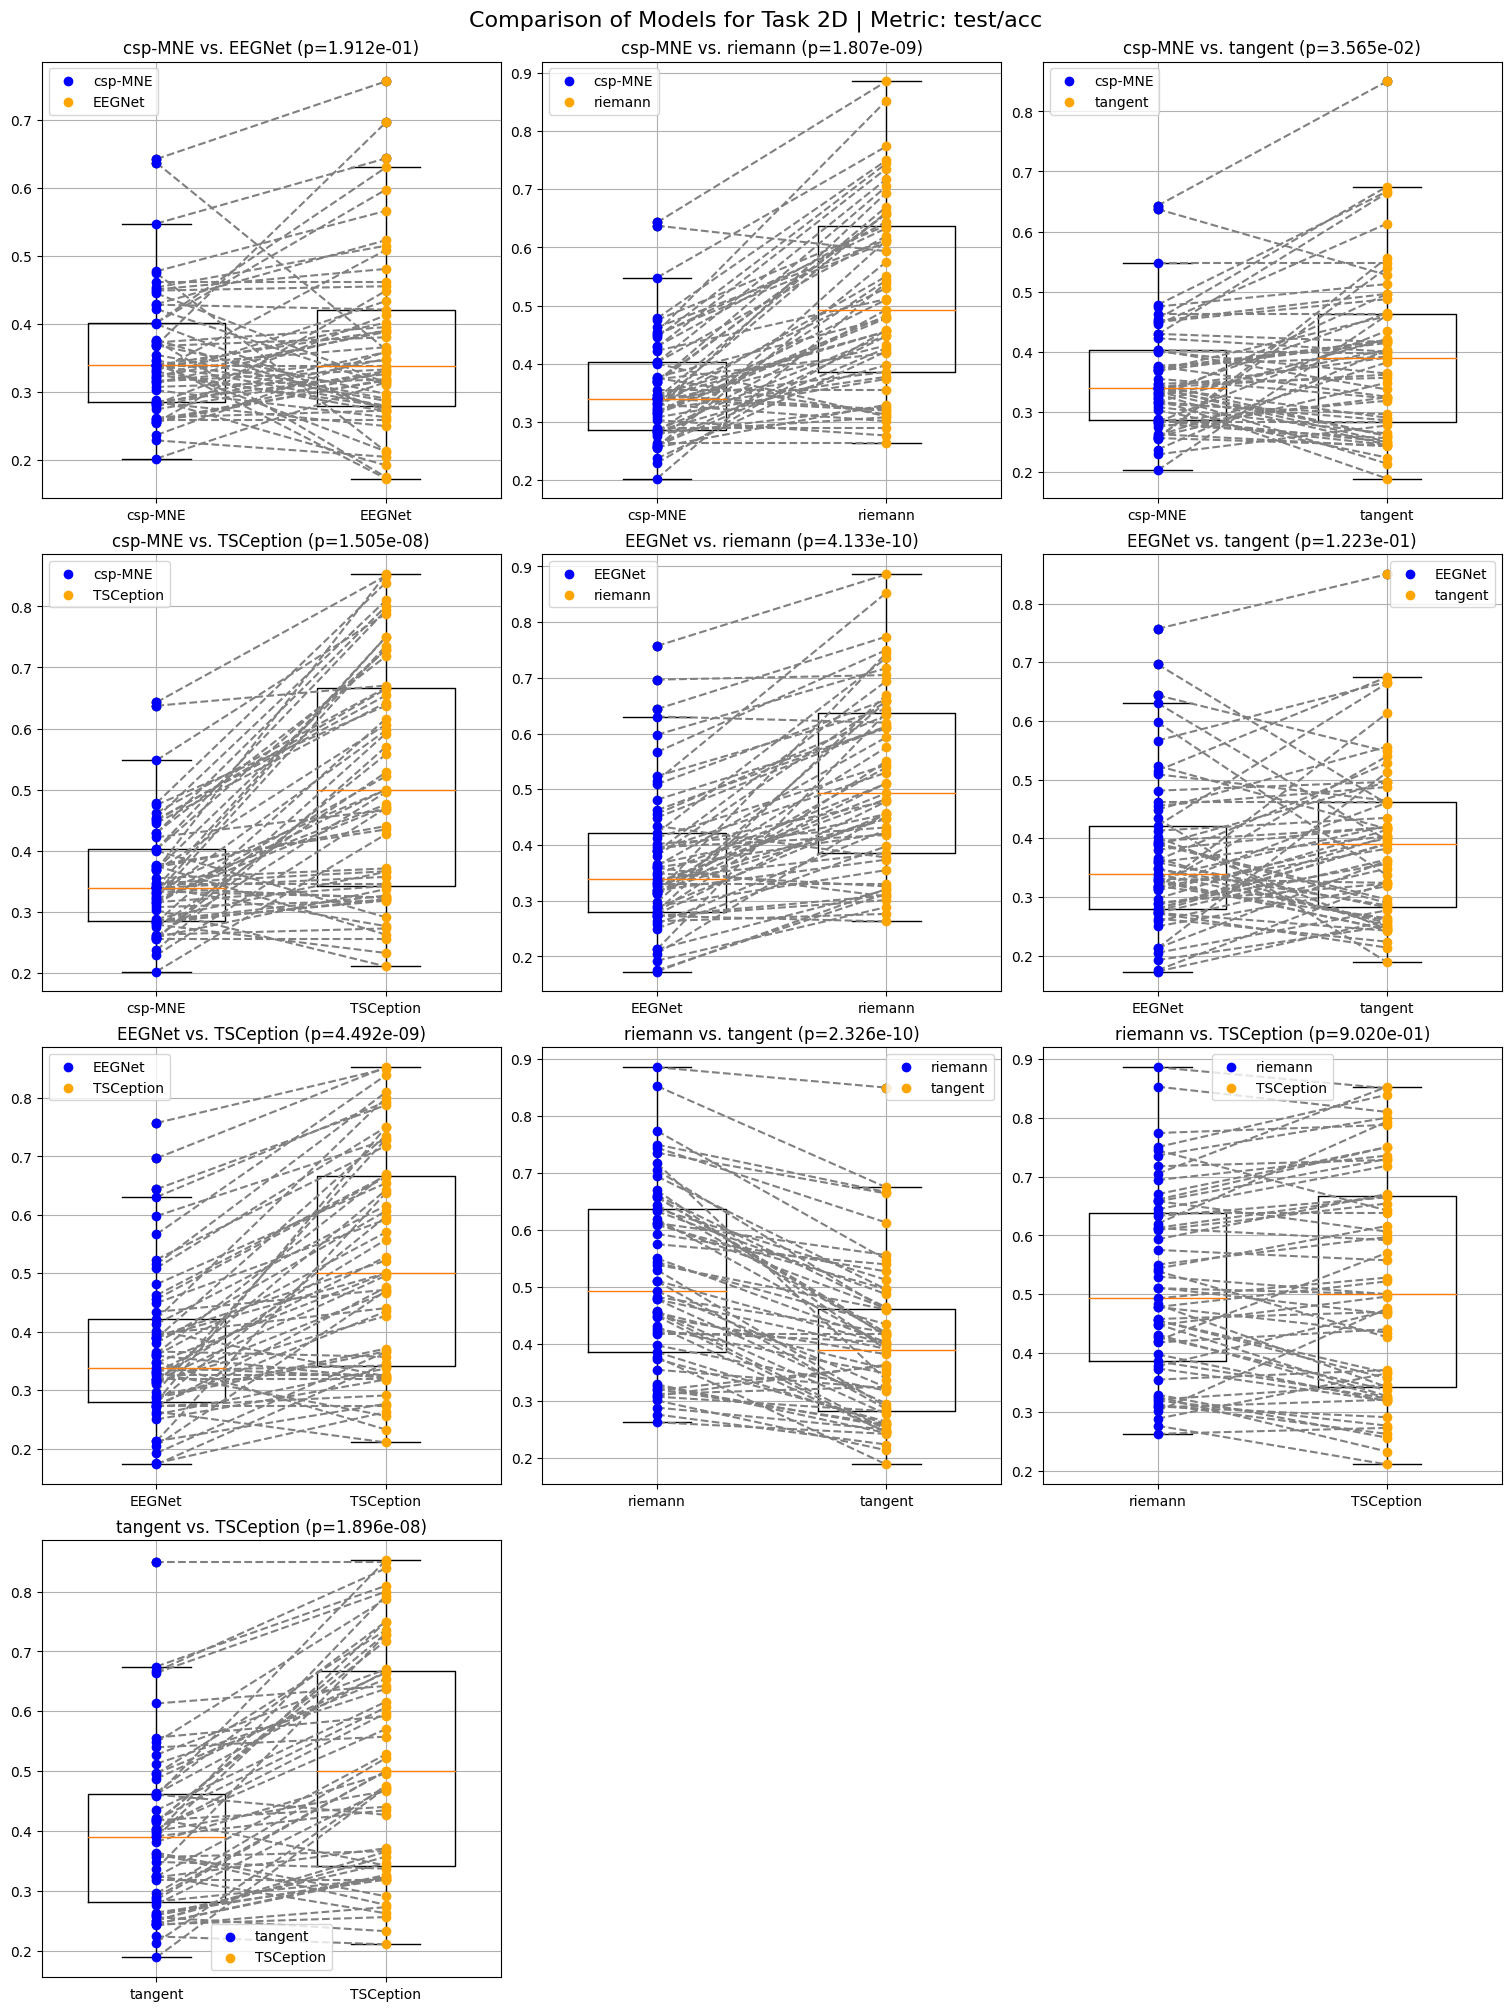

In [50]:
# Get unique models
metric_name = 'test/acc'
unique_models_2d = df_2d['Model'].unique()

# Create all unique pairs of models
model_pairs = list(itertools.combinations(unique_models_2d, 2))

# Number of rows and columns for subplots
n = len(model_pairs)
ncols = 3
nrows = n // ncols + (n % ncols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop through each pair and perform plotting
for i, (model1, model2) in enumerate(model_pairs):
    # Data for model 1
    scores_model1 = df_2d[df_2d['Model'] == model1][['Subject', metric_name]].set_index('Subject')
    # Data for model 2
    scores_model2 = df_2d[df_2d['Model'] == model2][['Subject', metric_name]].set_index('Subject')
    # Merge the scores
    merged_scores = scores_model1.join(scores_model2, lsuffix=f'_{model1}', rsuffix=f'_{model2}').dropna()
    
    # Calculate the Wilcoxon signed-rank test
    stat, p_value = wilcoxon(merged_scores[f'{metric_name}_{model1}'], merged_scores[f'{metric_name}_{model2}'])
    
    # Boxplot for model 1 scores
    axes[i].boxplot(merged_scores[f'{metric_name}_{model1}'], positions=[1], widths=0.6)
    # Boxplot for model 2 scores
    axes[i].boxplot(merged_scores[f'{metric_name}_{model2}'], positions=[2], widths=0.6)
    
    # Scatter plot and lines
    axes[i].scatter(np.repeat(1, merged_scores.shape[0]), merged_scores[f'{metric_name}_{model1}'], color='blue', label=model1, zorder=3)
    axes[i].scatter(np.repeat(2, merged_scores.shape[0]), merged_scores[f'{metric_name}_{model2}'], color='orange', label=model2, zorder=3)
    # Connect the dots for each subject
    for j in range(merged_scores.shape[0]):
        axes[i].plot([1, 2], [merged_scores[f'{metric_name}_{model1}'][j], merged_scores[f'{metric_name}_{model2}'][j]], color='grey', linestyle='--', zorder=2)
    
    # Formatting each subplot
    axes[i].set_xticks([1, 2])
    axes[i].set_xticklabels([model1, model2])
    axes[i].set_title(f'{model1} vs. {model2} (p={p_value:.3e})')
    axes[i].legend()
    axes[i].grid(True)

# Hide any unused subplots
for i in range(n, nrows * ncols):
    fig.delaxes(axes[i])

# Add a big title for the entire figure
fig.suptitle(f'Comparison of Models for Task 2D | Metric: {metric_name}', fontsize=16)


# Show the plot
plt.show()

In [51]:
# Summarizing the model performance in a table format

# Initialize a list to store performance summaries
model_performance_summary = []

# Loop through each model to summarize performance
for model in unique_models_2d:
    # Filter the data for the specific model
    model_data = df_2d[df_2d['Model'] == model]
    
    # Calculate summary statistics
    mean_val_acc = model_data[metric_name].mean()
    std_val_acc = model_data[metric_name].std()
    min_val_acc = model_data[metric_name].min()
    max_val_acc = model_data[metric_name].max()
    
    # Add to the performance summary list
    model_performance_summary.append({
        'Model': model,
        f'Mean {metric_name}': mean_val_acc,
        f'Std {metric_name}': std_val_acc,
        f'Min {metric_name}': min_val_acc,
        f'Max {metric_name}': max_val_acc
    })

# Convert the summary list to a DataFrame
performance_summary_df = pd.DataFrame(model_performance_summary)

# Sort the models by mean validation accuracy
performance_summary_df_sorted = performance_summary_df.sort_values(by=f'Mean {metric_name}', ascending=False)

# Display the performance summary table
performance_summary_df_sorted

,Model,Mean test/acc,Std test/acc,Min test/acc,Max test/acc
4,TSCeption,0.518720,0.189004,0.210526,0.852459
2,riemann,0.515145,0.158661,0.262626,0.885714
3,tangent,0.392933,0.135815,0.188679,0.850000
1,EEGNet,0.369631,0.128343,0.172840,0.757143
0,csp-MNE,0.354660,0.090934,0.202247,0.642857


In [18]:
from scipy.stats import wilcoxon
import itertools

# Filter the data to focus on the 'test/acc' metric
data_test_acc = data[['Model', 'Subject', 'test/acc']]

# Get unique models and subjects
models = data_test_acc['Model'].unique()
subjects = data_test_acc['Subject'].unique()

# Initialize a dictionary to store the Wilcoxon test results
wilcoxon_results = {}

# Perform pairwise Wilcoxon signed-rank tests for each subject
for subject in subjects:
    subject_data = data_test_acc[data_test_acc['Subject'] == subject]
    wilcoxon_results[subject] = {}
    for model_pair in itertools.combinations(models, 2):
        # Extract test accuracy for each model in the pair
        acc_model_1 = subject_data[subject_data['Model'] == model_pair[0]]['test/acc']
        acc_model_2 = subject_data[subject_data['Model'] == model_pair[1]]['test/acc']

        # Ensure there is data for both models before performing the test
        if not acc_model_1.empty and not acc_model_2.empty:
            # Perform Wilcoxon signed-rank test
            stat, p = wilcoxon(acc_model_1, acc_model_2)
            wilcoxon_results[subject][model_pair] = (stat, p)
        else:
            wilcoxon_results[subject][model_pair] = ('Data not available', 'Data not available')



In [16]:
# Identify the first two unique models in the DataFrame
unique_models = df_lr['Model'].unique()
unique_models

array(['csp', 'EEGNet', 'riemann', 'tangent', 'TSCeption'], dtype=object)

In [ ]:
models_names = df_lr['Model'].unique()

In [ ]:
Model_1 = "tangent"
Model_2 = "riemann"

# Filter the DataFrame for only those two models
df_model1 = df_lr[df_lr['Model'] == Model_1]
df_model2 = df_lr[df_lr['Model'] == Model_2]

# Ensure that each subject has both models' 'test/acc' values
# This creates a DataFrame with a 'test/acc' for each model for the same subjects
df_combined = pd.merge(df_model1[['Subject', 'test/acc']], df_model2[['Subject', 'test/acc']], 
                       on='Subject', suffixes=(f'_{Model_1}', f'_{Model_2}'))



In [ ]:
df_combined

In [ ]:
results = {f"{Model_1}x{Model_2}" : {} }

In [ ]:
results[]

In [ ]:
stat, p = wilcoxon(df_combined[f'test/acc_{Model_1}'], df_combined[f'test/acc_{Model_2}'])

In [ ]:
stat

In [ ]:
p

In [ ]:
# Perform the Wilcoxon signed-rank test for each subject
results = []
for subject in df_combined['Subject'].unique():
    acc_model1 = df_combined[df_combined['Subject'] == subject][f'test/acc_{Model_1}']
    acc_model2 = df_combined[df_combined['Subject'] == subject][f'test/acc_{Model_2}']

    # Calculate the differences and check if they are not all zero
    differences = acc_model1.values - acc_model2.values
    
    # Proceed with the test only if there are values for both models
    if not all(difference == 0 for difference in differences):
        stat, p = wilcoxon(acc_model1, acc_model2, zero_method="zsplit")
        results.append({
            'Subject': subject,
            'Model1': Model_1,
            'Model2': Model_2,
            'Statistic': stat,
            'P-Value': p
        })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Output the results
print(results_df)

C:\Users\alioo\Desktop\MA\bbcpy_AutoML\bbcpy_env\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


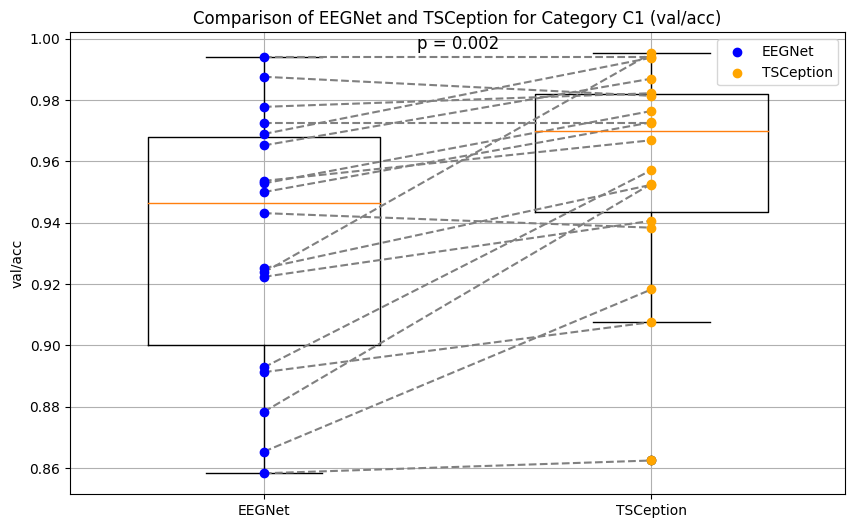

In [28]:
from scipy.stats import wilcoxon


# Filter the data to focus on EEGNet and TSCeption models for Category C1
data_eegnet_tsception_c1 = df_lr[(df_lr['Category'] == 'C1') & (df_lr['Model'].isin(['EEGNet', 'TSCeption']))]

# Extract val/acc scores for EEGNet and TSCeption for each subject
eegnet_scores = data_eegnet_tsception_c1[data_eegnet_tsception_c1['Model'] == 'EEGNet'][['Subject', 'val/acc']].set_index('Subject')
tsception_scores = data_eegnet_tsception_c1[data_eegnet_tsception_c1['Model'] == 'TSCeption'][['Subject', 'val/acc']].set_index('Subject')

# Merge the scores for plotting
merged_scores = eegnet_scores.join(tsception_scores, lsuffix='_EEGNet', rsuffix='_TSCeption').dropna()

# Prepare the data for plotting
subjects = merged_scores.index
scores_eegnet = merged_scores['val/acc_EEGNet']
scores_tsception = merged_scores['val/acc_TSCeption']

# Plotting
plt.figure(figsize=(10, 6))
# Plot EEGNet scores
plt.scatter(np.repeat(1, merged_scores.shape[0]), scores_eegnet, color='blue', label='EEGNet')
# Plot TSCeption scores
plt.scatter(np.repeat(2, merged_scores.shape[0]), scores_tsception, color='orange', label='TSCeption')
# Connect the dots for each subject
for i in range(merged_scores.shape[0]):
    plt.plot([1, 2], [scores_eegnet[i], scores_tsception[i]], color='grey', linestyle='--')

# Formatting the plot
plt.xticks([1, 2], ['EEGNet', 'TSCeption'])
plt.ylabel('val/acc')
plt.title('Comparison of EEGNet and TSCeption for Category C1 (val/acc)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Calculate the Wilcoxon signed-rank test for the two sets of scores
stat, p_value = wilcoxon(scores_eegnet, scores_tsception)

# Adding boxplots and p-value to the previous scatter plot
plt.figure(figsize=(10, 6))

# Boxplot for EEGNet scores
plt.boxplot(scores_eegnet, positions=[1], widths=0.6)
# Boxplot for TSCeption scores
plt.boxplot(scores_tsception, positions=[2], widths=0.6)

# Scatter plot and lines for EEGNet and TSCeption scores
# Plot EEGNet scores
plt.scatter(np.repeat(1, merged_scores.shape[0]), scores_eegnet, color='blue', label='EEGNet', zorder=3)
# Plot TSCeption scores
plt.scatter(np.repeat(2, merged_scores.shape[0]), scores_tsception, color='orange', label='TSCeption', zorder=3)
# Connect the dots for each subject
for i in range(merged_scores.shape[0]):
    plt.plot([1, 2], [scores_eegnet[i], scores_tsception[i]], color='grey', linestyle='--', zorder=2)

# Formatting the plot
plt.xticks([1, 2], ['EEGNet', 'TSCeption'])
plt.ylabel('val/acc')
plt.title('Comparison of EEGNet and TSCeption for Category C1 (val/acc)')
plt.legend()
plt.grid(True)

# Annotating the p-value on the plot
plt.text(1.5, max(max(scores_eegnet), max(scores_tsception)), f'p = {p_value:.3f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `results_df` is the DataFrame containing the test results from the Wilcoxon signed-rank test
# It should have columns 'Subject', 'Statistic', and 'P-Value'

# Define a significance level
alpha = 0.05

# Add a column indicating whether the result is significant
results_df['Significant'] = results_df['P-Value'] < alpha

# Plot
plt.figure(figsize=(14, 7))
plt.bar(results_df['Subject'], results_df['Statistic'], 
        color=results_df['Significant'].map({True: 'red', False: 'grey'}))

# Annotate the p-values or significance
for i, row in results_df.iterrows():
    plt.text(i, row['Statistic'], f"{'*' if row['Significant'] else 'ns'}",
             ha='center', va='bottom')

plt.title('Wilcoxon Signed-Rank Test Statistics by Subject')
plt.xlabel('Subject')
plt.ylabel('Test Statistic')
plt.axhline(y=0, color='black', linewidth=1)  # Add a reference line at y=0 if you're plotting differences
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many subjects
plt.show()


In [ ]:
# Define the models to compare
models_to_compare = ['csp', 'riemann', 'tangent', 'TSCeption']

# Filter the DataFrame to include only the specified models
df_filtered = df_lr[df_lr['Model'].isin(models_to_compare)]

# Prepare a DataFrame to store Wilcoxon test results
columns = ['Model1', 'Model2', 'Subject', 'Statistic', 'P-Value']
results_df = pd.DataFrame(columns=columns)

# Perform Wilcoxon signed-rank test for each subject across all pairs of models
for subject in df_filtered['Subject'].unique():
    subject_data = df_filtered[df_filtered['Subject'] == subject]
    for model_pair in itertools.combinations(models_to_compare, 2):
        model1_data = subject_data[subject_data['Model'] == model_pair[0]]['test/acc'].values
        model2_data = subject_data[subject_data['Model'] == model_pair[1]]['test/acc'].values
         # Calculate the differences and check if they are not all zero
        differences = acc_model1.values - acc_model2.values
        
        # Proceed with the test only if there are values for both models
        if not all(difference == 0 for difference in differences):
        # Ensure we have data for both models before performing the test
        # if len(model1_data) > 0 and len(model2_data) > 0:
            stat, p_value = wilcoxon(model1_data, model2_data)
            results_df = results_df.append({
                'Model1': model_pair[0],
                'Model2': model_pair[1],
                'Subject': subject,
                'Statistic': stat,
                'P-Value': p_value
            }, ignore_index=True)



In [ ]:
# Adjust p-values for multiple comparisons if necessary (not shown here)

# Plotting the results
# We'll create a scatter plot with each point representing a subject and a pair of models
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting settings
colors = ['red', 'blue', 'green', 'purple', 'orange']
marker_types = ['o', 's', '^', 'D', 'x']

# Iterate through each combination of models and plot the results
for i, (model_pair) in enumerate(itertools.combinations(models_to_compare, 2)):
    pair_results = results_df[(results_df['Model1'] == model_pair[0]) & (results_df['Model2'] == model_pair[1])]
    ax.scatter(pair_results['Statistic'], pair_results['P-Value'], 
               color=colors[i % len(colors)], marker=marker_types[i % len(marker_types)], 
               label=f'{model_pair[0]} vs {model_pair[1]}', alpha=0.6)

ax.set_xlabel('Wilcoxon Statistic')
ax.set_ylabel('P-Value')
ax.set_title('Pairwise Model Comparison Using Wilcoxon Test')
ax.axhline(0.05, color='grey', linestyle='--', label='Significance Threshold (p=0.05)')
ax.legend()

plt.show()

# Output the results DataFrame
results_df.head()

In [ ]:


# Create a color palette for each subject based on their category
category_palette = {'C1': sns.color_palette("Blues", as_cmap=True), 
                    'C2': sns.color_palette("Greens", as_cmap=True), 
                    'C3': sns.color_palette("Reds", as_cmap=True)}

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Adjust the positions for the violin plots
group_space = 0.2  # Space between the groups
violin_width = 0.15  # Width of each violin
models = df_lr['Model'].unique()
positions = np.arange(1, len(models) * 2, step=2)  # Base positions for models

# Plot the violin plots for each category
for i, category in enumerate(['C1', 'C2', 'C3']):
    subset = df_lr[df_lr['Category'] == category]
    sns.violinplot(x='Model', y='test/acc', data=subset, 
                   width=violin_width, position=positions + i * (violin_width + group_space), 
                   palette=[category_palette[category](0.5)], inner=None)

# Color the dots by their score within each category
for i, row in df_lr.iterrows():
    group_pos = positions[np.where(models == row['Model'])[0][0]]
    color = category_palette[row['Category']](row['test/acc'])
    plt.scatter(x=group_pos + (['C1', 'C2', 'C3'].index(row['Category'])) * (violin_width + group_space), 
                y=row['test/acc'], color=color, edgecolor='w')

# Custom legend for subject categories
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category,
                              markerfacecolor=category_palette[category](0.5), markersize=10)
                   for category in ['C1', 'C2', 'C3']]
plt.legend(handles=legend_elements, title='Subject Category')

# Set the title and labels
plt.title('Model Performance by Subject Category')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(positions + violin_width + group_space, models)

plt.tight_layout()
plt.show()

In [ ]:
# Categorize each subject into C1, C2, or C3
df_lr['Category'] = df_lr['Subject'].apply(
    lambda x: 'C1' if x in C1_list else ('C2' if x in C2_list else 'C3')
)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Define the color palette for the categories
palette = {"C1": "b", "C2": "g", "C3": "r"}

# Draw boxplots with seaborn
ax = sns.boxplot(data=df_lr, x='Model', y='test/acc', hue='Category', palette=palette, dodge=True)

# Annotate median values on each boxplot
for i, box in enumerate(ax.artists):
    # Calculate the median value for the boxplot
    category = labels[i]
    median_val = df_lr[df_lr['Category'] == category]['test/acc'].median()
    
    # Choose the x position based on the artist (box) x position
    x_pos = box.get_x() + box.get_width() / 2.0
    
    # Offset the y position slightly above the box for visibility
    y_offset = (df_lr['test/acc'].max() - df_lr['test/acc'].min()) * 0.03  # 3% of the range for offset
    y_pos = median_val + y_offset
    
    # Annotate the median value
    ax.text(x_pos, y_pos, f'{median_val:.2f}', 
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=20, color='black', weight='bold')

# Move the legend outside the plot
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')

# Enhance the plot aesthetics
plt.title('Model Performance by Subject Category')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

# Position the legend
plt.legend(title='Category', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate mean score for each subject
subject_scores = df_lr.groupby('Subject')['test/acc'].mean().sort_values(ascending=False)

# Create a color palette from dark to light based on the number of unique subjects
palette = sns.color_palette("Reds", n_colors=len(subject_scores))

# Map subjects to colors based on their sorted scores
color_map = dict(zip(subject_scores.index, palette))

# Set the figure size
plt.figure(figsize=(18, 9))

# Create the violin plot for 'test/acc'
sns.violinplot(x='Model', y='test/acc', data=df_lr, inner=None, color=".8")

# Overlay the individual data points with colors mapped to categories
category_colors = {"C1": "c", "C2": "g", "C3": "m"}
df_lr['Color'] = df_lr['Category'].map(category_colors)

sns.stripplot(x='Model', y='test/acc', data=df_lr, jitter=True, 
              hue='Category', palette=category_colors, dodge=True)

# Draw a threshold line

plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.9, color='b', linestyle='--')

# Set plot title and labels
plt.title('Distribution of Test Accuracies with Individual Data Points of Models - LR Task')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

# Limit the y-axis to not pass 1
plt.ylim(0, 1.5)

# Collect labels and handles and create a custom legend from them
handles, labels = plt.gca().get_legend_handles_labels()
category_handles = [handles[labels.index(cat)] for cat in category_colors]
category_labels = [cat for cat in category_colors]

# Determine the number of rows needed for the legend
legend_rows = len(category_labels) // 3 + (len(category_labels) % 3 > 0)

# Create the custom legend
lgd = plt.legend(category_handles, category_labels, loc='lower center',
                 bbox_to_anchor=(0.5, -0.1), ncol=legend_rows, title='Category')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()

In [ ]:
import os
import glob

# Path to the directory containing the files
file_path = "../local/bbcpy_AutoML/logs/11_11/results/"

# Pattern to match all csv files
pattern = os.path.join(file_path, "*.csv")

# List to hold dataframes
dataframes = []

# Iterate over files that match the csv pattern
for file in glob.glob(pattern):
    # Extract task name, model name, and subject name from the file name
    filename = os.path.basename(file)

    if len(filename.split("_")) == 3:
        task_name, model_name, subject_name = filename.split("_")
    else:
        task_name, _, model_name, subject_name = filename.split("_")
    
    subject_name = subject_name.split('.')[0]  # Remove the file extension
    
    # Load the CSV file
    df = pd.read_csv(file)
    
    # Select and rename columns that contain "mean"
    string_to_check = 'mean'
    is_mean_in_columns = any(string_to_check in col for col in df.columns)

    # Select and rename columns that contain "mean"
    string_to_check = 'best'
    is_best_in_columns = any(string_to_check in col for col in df.columns)

    if is_mean_in_columns:
        wanted_columns = ['mean_test/acc' , 'mean_test/f1' , 'mean_val/acc' , 'mean_val/f1' ]
        df = df[df.columns[df.columns.isin(wanted_columns)]]
        mean_columns = [col for col in df.columns if 'mean' in col]
        df = df[mean_columns].rename(columns=lambda x: x.replace('mean_', ''))
        # # Combine the mean columns back into the dataframe
        # df = pd.concat([df, df_best], axis=1)
        
    elif is_best_in_columns:
        wanted_columns = ['val/acc_best', 'val/f1_best']
        df_best = df[df.columns[df.columns.isin(wanted_columns)]]
        # Remove the string "best" from remaining column names
        best_columns = [col for col in df_best.columns if 'best' in col]
        df_best = df_best[best_columns].rename(columns=lambda x: x.replace('_best', ''))

        wanted_columns = ['test/f1', 'test/acc']
        df_test = df[df.columns[df.columns.isin(wanted_columns)]]
    
        # Combine the mean columns back into the dataframe
        df = pd.concat([df_best, df_test], axis=1)
    
    # Add task, model, and subject as columns to the dataframe
    df['Task'] = task_name
    df['Model'] = model_name
    df['Subject'] = subject_name
    
    # Append to the list of dataframes
    dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined dataframe
combined_data


In [ ]:
# Separate the data by task
df_2d = combined_data[combined_data['Task'] == '2D']
df_lr = combined_data[combined_data['Task'] == 'LR']

In [ ]:
df_2d

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


threshold_value = 0.6
column_name = "test/acc"  # Adjust based on your data

# Calculate mean score for each subject
subject_scores = df_lr.groupby('Subject')[column_name].mean().sort_values(ascending=False)

# Create a color palette from dark to light
palette = sns.color_palette("Reds", n_colors=len(subject_scores))

# Map subjects to colors based on their sorted scores
color_map = dict(zip(subject_scores.index, palette))

plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='Model', y=column_name, data=df_lr, inner=None, color=".8")

# Overlay the individual data points with colors mapped to subjects
# Set the hue order to the sorted subjects
sns.stripplot(x='Model', y=column_name, data=df_lr, jitter=True, 
              hue='Subject', zorder=1, palette=color_map, hue_order=subject_scores.index)

# Draw a threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--')

plt.title('Distribution of Test Accuracies with Individual Data Points of Models- LR task')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

# Add legend outside the plot, sorted according to subject scores
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


threshold_value = 0.6
column_name = "test/acc"  # Adjust based on your data

# Calculate mean score for each subject
subject_scores = df_2d.groupby('Subject')[column_name].mean().sort_values(ascending=False)

# Create a color palette from dark to light
palette = sns.color_palette("Reds", n_colors=len(subject_scores))

# Map subjects to colors based on their sorted scores
color_map = dict(zip(subject_scores.index, palette))

plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='Model', y=column_name, data=df_2d, inner=None, color=".8")

# Overlay the individual data points with colors mapped to subjects
# Set the hue order to the sorted subjects
sns.stripplot(x='Model', y=column_name, data=df_2d, jitter=True, 
              hue='Subject', zorder=1, palette=color_map, hue_order=subject_scores.index)

# Draw a threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--')

plt.title('Distribution of Test Accuracies with Individual Data Points of Models- 2D task')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

# Add legend outside the plot, sorted according to subject scores
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
